# Kaggle begining : Housing Price competition

This notebook's goal is to predict the price for each house in the Kaggle test set, through the variable *SalePrice*.

Metrics : 
> Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Competion website [here](https://www.kaggle.com/competitions/home-data-for-ml-course/overview)

## General Part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 1500)
pd.set_option('display.max_column', 81)

In [3]:
data =  pd.read_csv('data/train.csv') 
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Exploratory Data Analysis 

**Goal :** Understand data
EDA can be begin on the Kaggle website in the *Data* tab.

**Form :**
- **Target variable :** *SalePrice*
- **Lines and columns :** 1460 rows × 81 columns
- **Variables' type :** 38 numerical, 43 object
- **Missings data :**
    - Some variables with many NaN. With a look on variables descriptions, and variables types/values, we understand it is relative to a missing option in the house. I think it is better to replace it with a 'None' str tag.
    - Seems to havee 2 groups base on variables' missings :
        - *basement* with 0.025 to 0.027 % of missings (BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, BsmtExposure)
        - *garage* with 0.055479 % of missings (GarageQual, GarageFinish, GarageYrBlt, GarageType, GarageCond)

**Content :**
- **Target visualisation :** IQR = 163,000 [129,975 ; 214,000]. Some outliers, in particular after 500,000.
- **Variables signification :**
    - Numericals : 
        - Not standardized data
        - Many variables are disretized
        - Gaussian lookalike curves with sometimes peak in 0 and often skewed
    - Objects :
        - With only one category represented : *Street, Utilities*
        - Some variables seems to have poor categories variations
            - Try to binarize ? Major category / others ?
            - For *Condition1* and *Condition2* : merge ? Keep only first ? 
    - For more : cf *data_description.txt*
- **Variables/Target relations :**
    - Surface (F1, full basement, garage, GrLivArea) seems to influence target
    - Quality (OverallQual, BsmtCond) seems to influence target
    - Some periodicity (sale (june), remodel, construction)
    - Some poor corelate variables
    - => majority of object variables seems to influence target -> **test influences with univariate regression**
    - Strong correlation with *OverallQual*
    - Moderate correlation with *YearRemodAdd, YearBuilt, TotRmsAbvGrd, FullBath, 1stFlrSF, TotalBsmtSF, GarageArea, GarageCars, GrLivArea*

**Advanced part :**
- **Variables/Variables relations :**
  
    - *Exterior1st* / *Exterior2nd* : 85% the same value
    - *Garage* / *Garage* : GarageCars and GarageArea are highly correlated
    - *Basement* / *Basement* : BsmtSF1 / BsmtFullBath / TotalBsmtSf + TotalBsmtSF / BsmtUnfSF are highly/good correlated
    - *Basement* / *Garage* : no visible correlation
    - *Garage* / *GarageYrBlt* : no tendancy
    - *Basement* / *YearBuilt* : no tendancy
    - *Garage* / *YrSold* : no real tendancy for sold years
    - *Basement* / *YrSold* : no real tendancy for sold years
    - *Garage* / *OverallQual* : seems to have correlations
    - *Basement* / *OverallQual* : seems to have correlations

  
- **NaN advanced :** /
- **Hypothesis** (H0) : No particular hypothesis to verify

**Conclusion :**

### Form

In [4]:
df_eda = data.copy(deep=True)

In [5]:
df_eda.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
df_eda.shape

(1460, 81)

<Axes: >

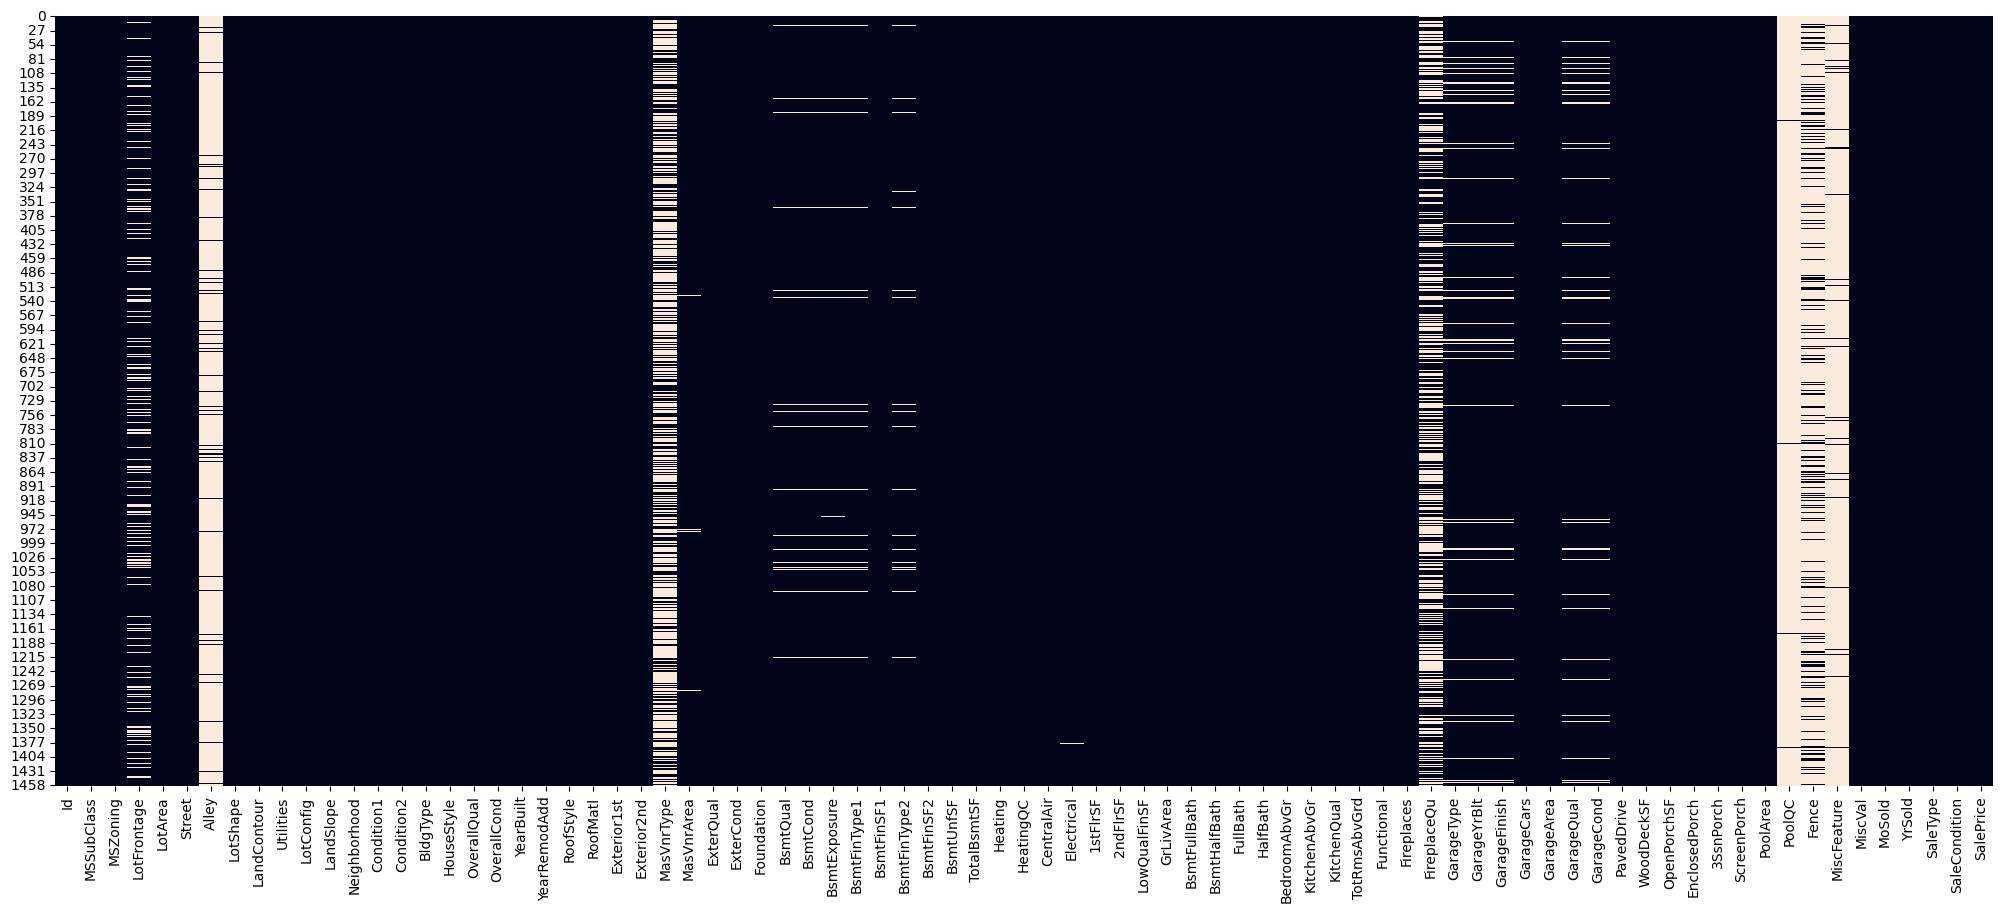

In [7]:
plt.figure(figsize=(25,10))
sns.heatmap(df_eda.isna(), cbar=False)

In [8]:
(df_eda.isna().sum()/df_eda.shape[0]).sort_values()

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
Utilities        0.000000
LandContour      0.000000
Neighborhood

In [9]:
for col in df_eda.columns[(df_eda.isna().sum() > 0)] :
    print(f'{col :-<20} {df_eda[col].dtypes}')

LotFrontage--------- float64
Alley--------------- object
MasVnrType---------- object
MasVnrArea---------- float64
BsmtQual------------ object
BsmtCond------------ object
BsmtExposure-------- object
BsmtFinType1-------- object
BsmtFinType2-------- object
Electrical---------- object
FireplaceQu--------- object
GarageType---------- object
GarageYrBlt--------- float64
GarageFinish-------- object
GarageQual---------- object
GarageCond---------- object
PoolQC-------------- object
Fence--------------- object
MiscFeature--------- object


In [10]:
tmp = list(df_eda['LotFrontage'].value_counts(sort=False).index)
tmp.sort()
tmp

[21.0,
 24.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 116.0,
 118.0,
 120.0,
 121.0,
 122.0,
 124.0,
 128.0,
 129.0,
 130.0,
 134.0,
 137.0,
 138.0,
 140.0,
 141.0,
 144.0,
 149.0,
 150.0,
 152.0,
 153.0,
 160.0,
 168.0,
 174.0,
 182.0,
 313.0]

We can see NaN values are only for non existing options and correspondings variables. For *LotFrontage* it's confirmed by the absence of 0.

### Content
#### Removing useless columns

For now, we can keep all columns except Id

In [11]:
df_eda = df_eda.drop('Id', axis=1)
df_eda.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

#### Target Visualization

<Axes: xlabel='SalePrice', ylabel='Density'>

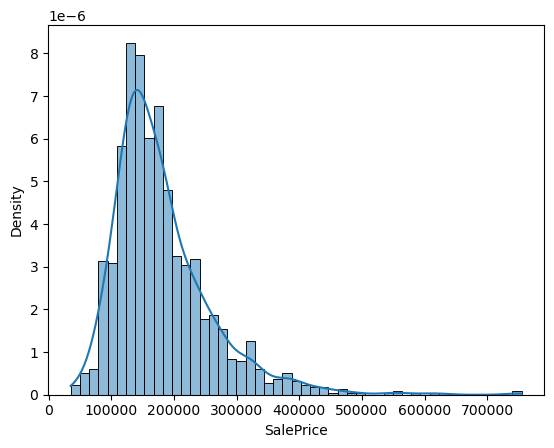

In [12]:
 sns.histplot(df_eda['SalePrice'], kde=True, stat="density")

In [13]:
df_eda['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='SalePrice'>

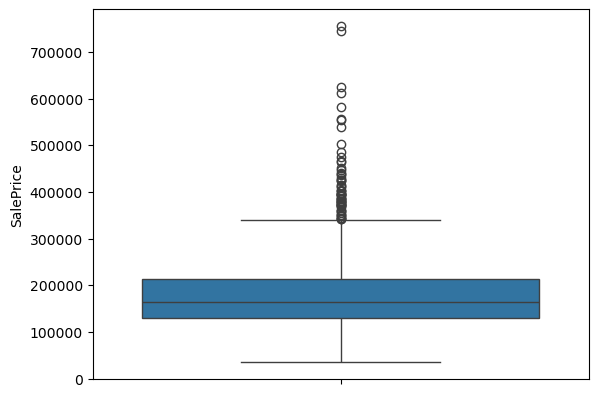

In [14]:
sns.boxplot(data=df_eda['SalePrice'])

#### Variables visualization

In [15]:
"""
for col in df_eda.select_dtypes(['int64','float64']):
    plt.figure()
    sns.histplot(df_eda[col], kde=True, stat="density")
"""

'\nfor col in df_eda.select_dtypes([\'int64\',\'float64\']):\n    plt.figure()\n    sns.histplot(df_eda[col], kde=True, stat="density")\n'

In [16]:
def get_lbl(vc):
    return [str(x) + '(' + str(int(round(y*100,0))) + '%)' for x, y in zip(vc.index, vc.values)]
"""
for col in df_eda.select_dtypes(['object']):
    plt.figure()
    vc = df_eda[col].value_counts(normalize=True)
    vc.plot.pie(labels=get_lbl(vc), title=col)
"""

"\nfor col in df_eda.select_dtypes(['object']):\n    plt.figure()\n    vc = df_eda[col].value_counts(normalize=True)\n    vc.plot.pie(labels=get_lbl(vc), title=col)\n"

#### Relation Var/Target
##### Sub groups creation

In [17]:
basement = list(df_eda.columns[df_eda.columns.str.contains('Bsmt')])
basement

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [18]:
garage = list(df_eda.columns[df_eda.columns.str.contains('Garage')])
garage

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [19]:
obj_cols = list(df_eda.select_dtypes(['object']).columns)
len(obj_cols)

43

In [20]:
num_cols = list(df_eda.select_dtypes(['int64','float64']).columns)
len(num_cols)

37

In [21]:
all_var_cols = df_eda.columns
all_var_cols = all_var_cols.drop('SalePrice')

___

In [22]:
"""
for col in all_var_cols:
    sns.relplot(data=df_eda, x=col, y='SalePrice')
"""

"\nfor col in all_var_cols:\n    sns.relplot(data=df_eda, x=col, y='SalePrice')\n"

In [23]:
#for col in df_eda.select_dtypes(['int64','float64']):
    #sns.relplot(data=df_eda, kind="line", x=col, y='SalePrice', errorbar="sd")

In [24]:
"""
for col in df_eda.select_dtypes(['int64','float64']):
    sns.jointplot(data=df_eda, x=col, y='SalePrice', kind="kde", fill=True)
"""

'\nfor col in df_eda.select_dtypes([\'int64\',\'float64\']):\n    sns.jointplot(data=df_eda, x=col, y=\'SalePrice\', kind="kde", fill=True)\n'

In [25]:
"""
for col in df_eda.select_dtypes(['object']):
    plt.figure()
    sns.histplot(data=df_eda, x='SalePrice', kde=True, stat="density", hue=col)
    plt.title(col)
"""

'\nfor col in df_eda.select_dtypes([\'object\']):\n    plt.figure()\n    sns.histplot(data=df_eda, x=\'SalePrice\', kde=True, stat="density", hue=col)\n    plt.title(col)\n'

##### Basement / Target

In [26]:
"""
for col in basement:
    sns.relplot(data=df_eda, x=col, y='SalePrice')
"""

"\nfor col in basement:\n    sns.relplot(data=df_eda, x=col, y='SalePrice')\n"

Seems to have influence :
- BsmtQual
- BsmtCond
- BsmtFinSF1
- BsmtFinType2 (Unf + GLQ/other)
- BsmtFinSF2
- BsmtFinType2 (Unf/other)
- TotalBsmtSF
- BsmtHalfBath

##### Garage/Target

In [27]:
"""
for col in garage:
    sns.relplot(data=df_eda, x=col, y='SalePrice')
"""

"\nfor col in garage:\n    sns.relplot(data=df_eda, x=col, y='SalePrice')\n"

Seems to have an influence :
- GarageType
- GarageCars
- GarageArea
- GarageQual
- GarageCond

___

In [28]:
df_eda[num_cols].corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Advenced EDA
#### Relation Var/Var
##### Exterior1st / Exterior2nd

<Axes: xlabel='Exterior2nd', ylabel='Exterior1st'>

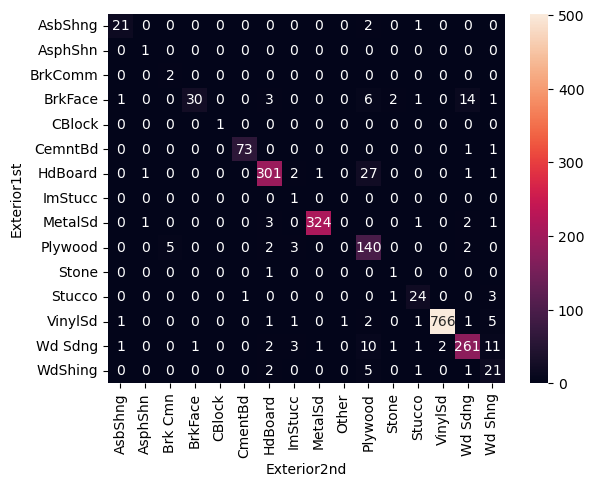

In [29]:
sns.heatmap(pd.crosstab(df_eda['Exterior1st'], df_eda['Exterior2nd']), annot=True, fmt='o')

<Axes: ylabel='proportion'>

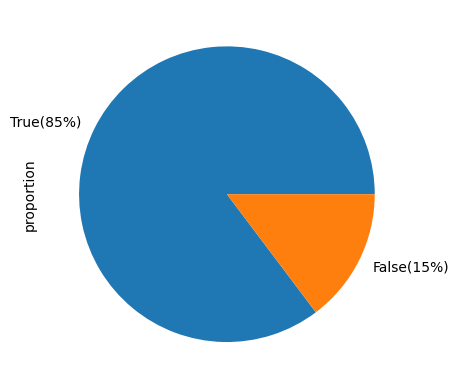

In [30]:
vc = (df_eda['Exterior1st'] == df_eda['Exterior2nd']).value_counts(normalize=True)
vc.plot.pie(labels=get_lbl(vc))

___

##### Garage / Garage

In [31]:
"""
sns.pairplot(df_eda[garage], vars=garage)
"""

'\nsns.pairplot(df_eda[garage], vars=garage)\n'

In [32]:
"""
sns.clustermap(df_eda[list(set(garage) & set(num_cols))].corr())
"""

'\nsns.clustermap(df_eda[list(set(garage) & set(num_cols))].corr())\n'

___
##### Basement / Basement

In [33]:
"""
sns.pairplot(df_eda[basement], vars=basement)
"""

'\nsns.pairplot(df_eda[basement], vars=basement)\n'

In [34]:
"""
sns.clustermap(df_eda[list(set(basement) & set(num_cols))].corr())
"""

'\nsns.clustermap(df_eda[list(set(basement) & set(num_cols))].corr())\n'

___
##### Garage / Basement

In [35]:
"""
sns.pairplot(df_eda, x_vars=garage, y_vars=basement)
"""

'\nsns.pairplot(df_eda, x_vars=garage, y_vars=basement)\n'

___
##### Garage / YrSold

In [36]:
"""
sns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(garage) & set(num_cols)), kind='reg')
"""

"\nsns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(garage) & set(num_cols)), kind='reg')\n"

In [37]:
"""
for col in list(set(garage) & set(obj_cols)):
    plt.figure()
    sns.countplot(x=col, hue='YrSold', data=df_eda)
    plt.title(col)
"""

"\nfor col in list(set(garage) & set(obj_cols)):\n    plt.figure()\n    sns.countplot(x=col, hue='YrSold', data=df_eda)\n    plt.title(col)\n"

___
##### Basement / YrSold

In [38]:
"""
sns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(basement) & set(num_cols)), kind='reg')
"""

"\nsns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(basement) & set(num_cols)), kind='reg')\n"

In [39]:
"""
for col in list(set(basement) & set(obj_cols)):
    plt.figure()
    sns.countplot(x=col, hue='YrSold', data=df_eda)
    plt.title(col)
"""

"\nfor col in list(set(basement) & set(obj_cols)):\n    plt.figure()\n    sns.countplot(x=col, hue='YrSold', data=df_eda)\n    plt.title(col)\n"

___
##### Basement / YearBuilt

In [40]:
"""
sns.pairplot(df_eda, x_vars=['YearBuilt'], y_vars=list(set(basement) & set(num_cols)), kind='reg')
"""

"\nsns.pairplot(df_eda, x_vars=['YearBuilt'], y_vars=list(set(basement) & set(num_cols)), kind='reg')\n"

___
##### Garage / OverallQual

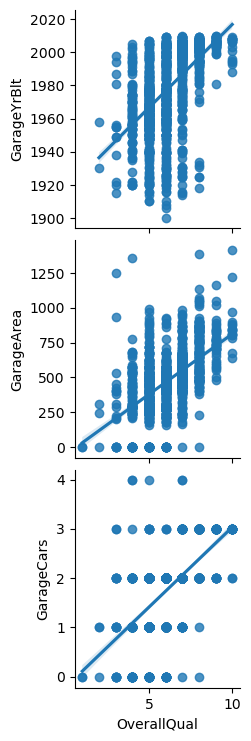

In [41]:
sns.pairplot(df_eda, x_vars=['OverallQual'], y_vars=list(set(garage) & set(num_cols)), kind='reg')

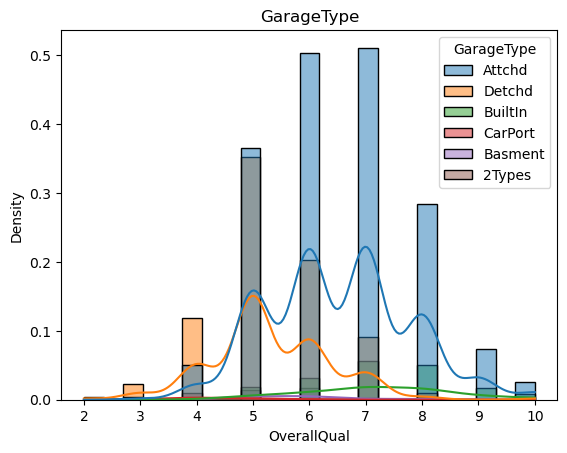

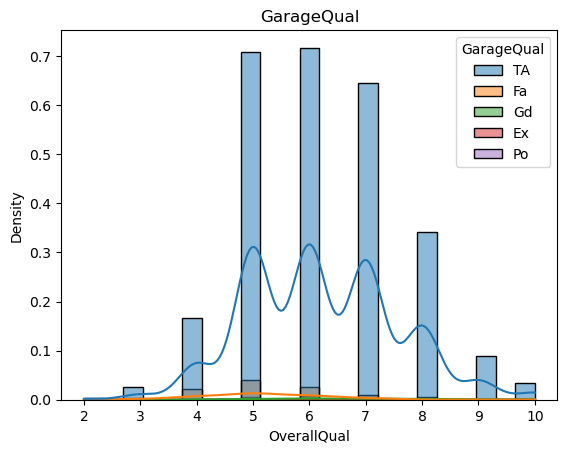

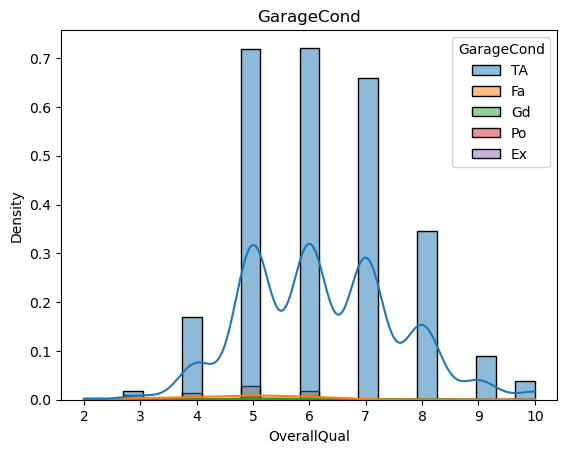

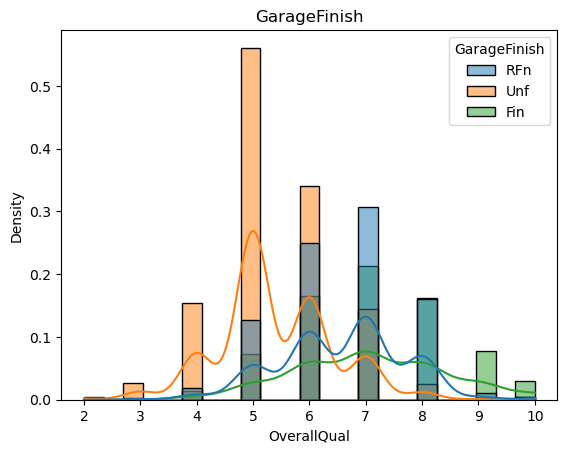

In [42]:
for col in list(set(garage) & set(obj_cols)):
    plt.figure()
    sns.histplot(data=df_eda, x='OverallQual', kde=True, stat="density", hue=col)
    plt.title(col)

___
##### Basement / OverallQual

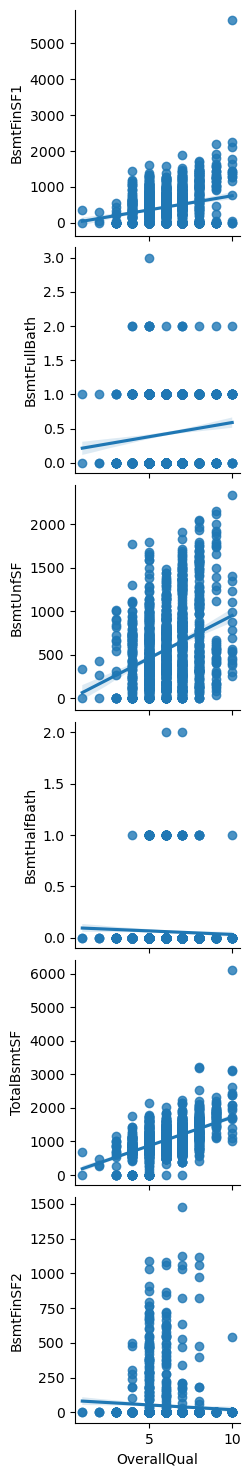

In [43]:
sns.pairplot(df_eda, x_vars=['OverallQual'], y_vars=list(set(basement) & set(num_cols)), kind='reg')

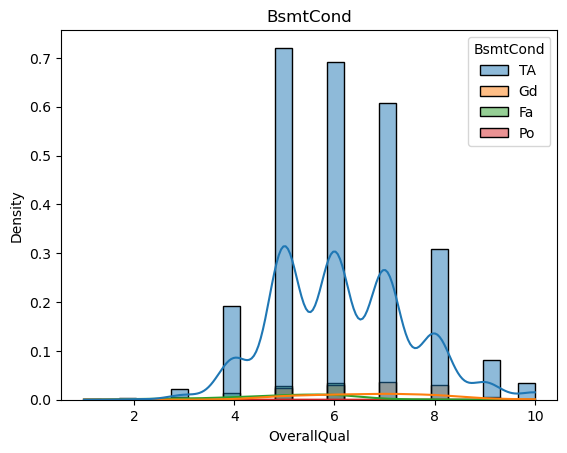

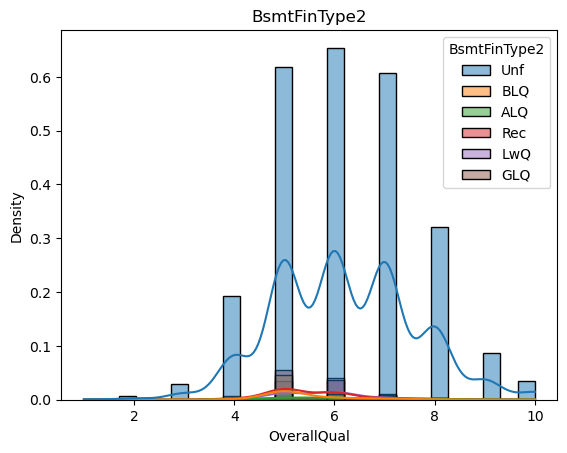

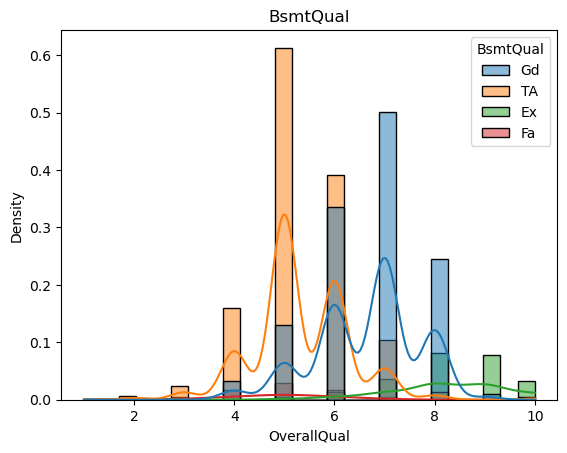

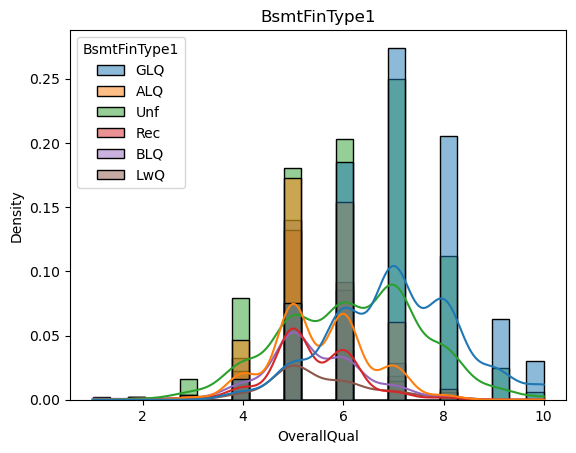

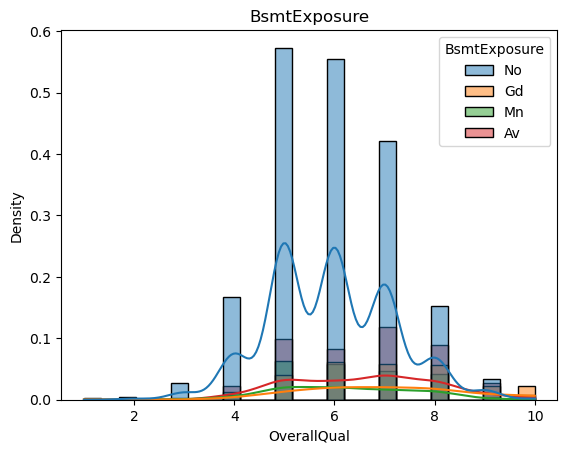

In [44]:
for col in list(set(basement) & set(obj_cols)):
    plt.figure()
    sns.histplot(data=df_eda, x='OverallQual', kde=True, stat="density", hue=col)
    plt.title(col)

#### Advenced NaN analysis

/

#### Hypothesis test

/

## Pre-processing

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #OrdinalEncoder
from sklearn.ensemble import IsolationForest
from scipy.stats import ttest_ind, chisquare

### Step 1 : Formatting data to prepare model creation

- Train / test
- Encoding
- NaN cleaning

In [46]:
df = data.copy(deep=True)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [47]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)
print(trainset.shape)
print(testset.shape)

(1095, 81)
(365, 81)


In [48]:
def t_test(df_pos, df_neg, col, alpha=0.05):
    stat, p = ttest_ind(df_neg[col].dropna(), df_pos[col].dropna())
    if p < alpha:
        return 'H0 rejected'
    else:
        return 'H0 not rejected (p=' + str(p) + ')'

In [49]:
t_test(trainset, trainset, 'SalePrice')

'H0 not rejected (p=1.0)'

No significatives target differences between train and test sets.

#### Encoding variables

Here we use OneHotEncoders because of regression models sensibility on encoding

In [183]:
def encoding(p_df, encoder=None):
    df_to_encode = p_df[obj_cols]

    if encoder==None:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")
        df_encoded = encoder.fit_transform(df_to_encode)
    else:
        df_encoded = encoder.transform(df_to_encode)

    num_col_lst = list(p_df.select_dtypes(['int64','float64']).columns)
    df_num = p_df[num_col_lst + ['Id']]
    new_df = df_num.join(df_encoded) 
    
    return new_df, encoder 

In [51]:
#tmp, tmp2 = encoding(trainset, 'SalePrice')
#tmp.head()

In [52]:
#tmp.isna().sum().sort_values()

In [175]:
def feature_engineering(df, y_name):

    ndf = df.copy(deep=True)
    ndf = ndf.drop([
        'Id',
    ], axis = 1)

    # re equilibrate skewed variables
    skewed = ['2ndFlrSF',
             'BsmtFinSF1',
             'BsmtFinSF2',
             'BsmtUnfSF',
             'EnclosedPorch',
             'GrLivArea',
             'LotArea',
             'LotFrontage',
             'MasVnrArea',
             'OpenPorchSF1stFlrSF',
             'ScreenPorch',
             'TotalBsmtSF',
             'WoodDeckSF',
             ]
    if y_name in list(df.columns):
        skewed.append(y_name)
        
    ndf = ndf.apply(
        lambda x: np.log(x) if (x.name in skewed and not x.isnull().any() and (x > 0).all()) else x
    )
    
    return ndf

In [54]:
def imputation(df):
    ndf = df.copy(deep=True)
    #ndf['isna'] = ndf.isna().sum(axis=1)
    ndf = df.fillna(-999)
    return ndf

In [55]:
def outliers_removing(df, x_cols):
    
    ndf = df
    model = IsolationForest(contamination=0.02, random_state=0)
    not_outliers = (model.fit_predict(ndf[x_cols]) != -1)
    ndf = ndf[not_outliers]
    
    return ndf

In [235]:
def preprocessing(df, encoder=None, y_name='SalePrice', remove_outliers=True):
    ndf, encoder = encoding(df, encoder)
    ndf = feature_engineering(ndf, y_name)
    ndf = imputation(ndf)

    if remove_outliers:
        x_cols = list(ndf.columns)
        if y_name in x_cols:
            x_cols.remove(y_name)
        ndf = outliers_removing(ndf, x_cols)

    if y_name in list(ndf.columns):
        X = ndf.drop(y_name, axis = 1)
        y = ndf[y_name]
    else:
        X = ndf
        y = None
        print('No outcome')

    return X, y, encoder

In [185]:
X_train, y_train, encoder_train = preprocessing(trainset)
print(X_train.shape)
print(y_train.shape)

(1073, 297)
(1073,)


In [186]:
X_test, y_test, _ = preprocessing(testset, encoder=encoder_train)
print(X_test.shape)
print(y_test.shape)

(357, 297)
(357,)


In [59]:
"""
plt.figure()
sns.histplot(df_eda['SalePrice'], kde=True, stat="density")
plt.figure()
sns.histplot(y_train, kde=True, stat="density")
"""

'\nplt.figure()\nsns.histplot(df_eda[\'SalePrice\'], kde=True, stat="density")\nplt.figure()\nsns.histplot(y_train, kde=True, stat="density")\n'

### Step 2 : Improve formatting to improve model

*After first models tests*
- Feature selection
- Feature engineering
- Feature scaling -> no needed because forest models aren't sensitive to normalization 
- Outliers

In [60]:
X_train.var(axis=0).sort_values()

Exterior2nd_AsphShn           0.000000
PoolQC_Ex                     0.000000
Condition2_Artery             0.000000
Exterior1st_AsphShn           0.000000
Condition2_PosN               0.000000
PoolQC_Fa                     0.000932
RoofMatl_Membran              0.000932
Heating_OthW                  0.000932
Heating_Wall                  0.000932
Foundation_Wood               0.000932
LotConfig_FR3                 0.000932
Utilities_NoSeWa              0.000932
Utilities_AllPub              0.000932
GarageCond_Ex                 0.000932
SaleType_Con                  0.000932
PoolQC_Gd                     0.000932
Exterior1st_BrkComm           0.000932
Exterior1st_ImStucc           0.000932
HeatingQC_Po                  0.000932
Electrical_nan                0.000932
ExterCond_Po                  0.000932
RoofMatl_Metal                0.000932
Condition2_RRAe               0.000932
Exterior1st_CBlock            0.000932
Exterior2nd_CBlock            0.000932
SaleType_Oth             

In [61]:
#X_train[num_cols].var(axis=0).sort_values()

In [62]:
"""
st, pval = f_regression(X_train, y_train)
tmp = X_train[X_train.columns[pval<=0.05]]
tmp = list(tmp.columns)
tmp.sort()
print(len(tmp))
tmp
"""

'\nst, pval = f_regression(X_train, y_train)\ntmp = X_train[X_train.columns[pval<=0.05]]\ntmp = list(tmp.columns)\ntmp.sort()\nprint(len(tmp))\ntmp\n'

In [63]:
"""
tmp = trainset[trainset['SalePrice'] > 350000]
outliers_p = len(tmp.index) / len(X_train.index) * 100
outliers_p
"""

"\ntmp = trainset[trainset['SalePrice'] > 350000]\noutliers_p = len(tmp.index) / len(X_train.index) * 100\noutliers_p\n"

## Modelling

In [85]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet,\
                                 BayesianRidge, ARDRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [65]:
#model = LinearRegression()

### Evaluation process

In [66]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import learning_curve

In [67]:
def evaluation(model, model_name=''):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    mean_ae = mean_absolute_error(y_test, y_pred)
    med_ae = median_absolute_error(y_test, y_pred)
    print('Scores :')
    print(f'RMSE : {rmse} ({round(np.exp(rmse), 2)}$)')
    print(f'MeanAE : {mean_ae} ({round(np.exp(mean_ae), 2)}$)')
    print(f'MedAE : {med_ae} ({round(np.exp(med_ae), 2)}$)')
    print('\n')

    plt.figure(figsize=(12,8))
    err_hist = np.abs(y_test - y_pred)
    plt.hist(err_hist, bins=50)
    plt.show()

    for metric in ['neg_root_mean_squared_error']: #, 'neg_mean_absolute_error', 'neg_median_absolute_error']:
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                   cv=5, scoring=metric,
                                                   train_sizes=np.linspace(0.1,1,10),
                                                   random_state=0
                                                  )
        
        plt.figure(figsize=(12,8))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.title(model_name + '_' * int(model_name != '') + metric)
        plt.legend()
        plt.show()

### Pre modelling for preprocessing

In [68]:
model = make_pipeline(
                      #PolynomialFeatures(2),
                      SelectKBest(f_regression,k=179),
                      #PCA(n_components=87),
                      RobustScaler(),
                      LinearRegression()
)

___

Scores :
RMSE : 0.11790154547561242 (1.13$)
MeanAE : 0.08127250892628017 (1.08$)
MedAE : 0.058284583988205796 (1.06$)




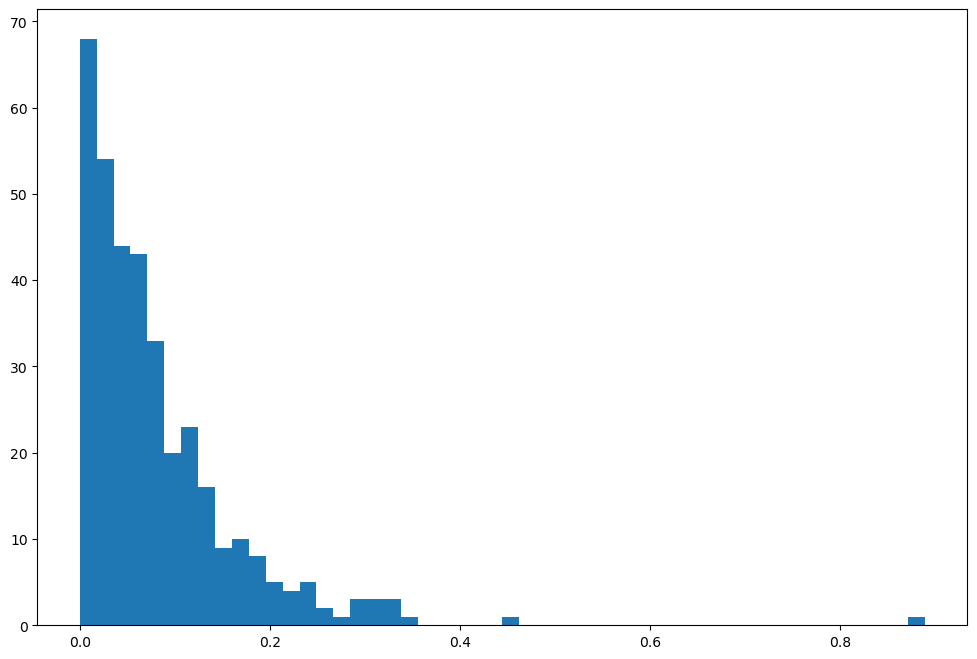

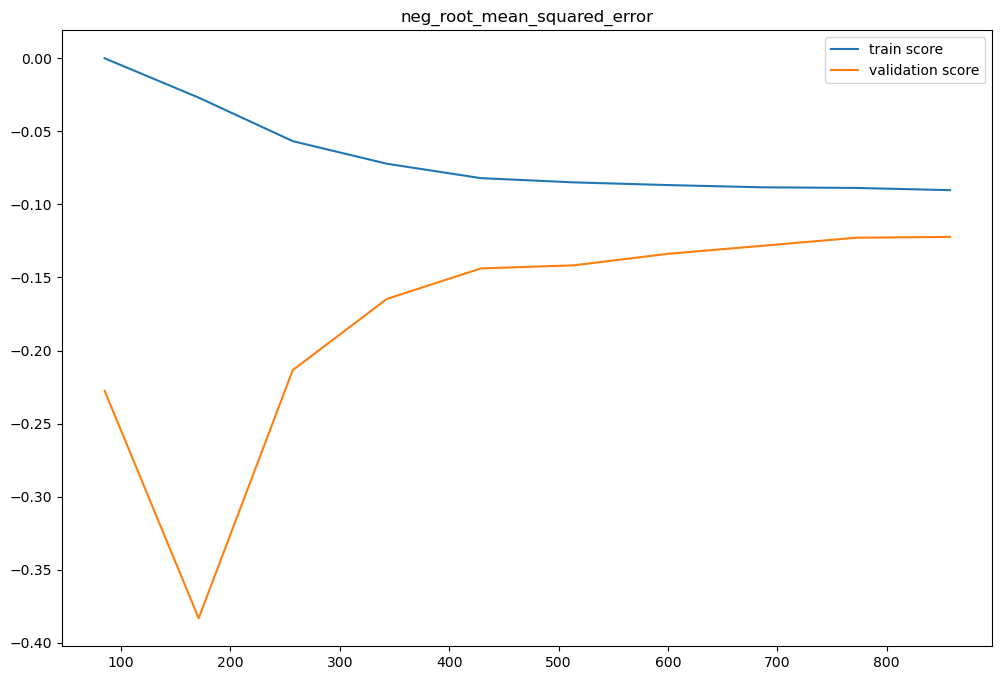

In [69]:
evaluation(model)

Pre model try :
1. LinearRegression *without* scaler :
    - score : 53962.26782876536
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
2. LinearRegression *with* StandarScaler :
    - score : 2.08436164931743e+17
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
3. LinearRegression *without* scaler :
    - score : 49541.50985151606
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
4. LinearRegression *with* RobustScaler :
    - score : 49541.50985151606
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
5. LinearRegression *with* RobustScaler + keep only p>0.2 at univariate :
    - score : 49541.50985151606
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
6. LinearRegression *with* RobustScaler + keep only p>0.05 at univariate :
    - score : 
        - RMSE : 37945.80399565608
        - MeanAE : 19524.636089584248
        - MedSE : 13429.146306039867
    - curve :
        - train = validation
        - error ≃ score
7. LinearRegression *with* RobustScaler + keep only 179 kbest (nothing change else than the use of selectKbest)
8. Same + PCA : worst
9. Same + PolynomialFeatures : disastrous
10. LinearRegression *with* RobustScaler + same + outliers removed ('auto') :
    - score : 
        - RMSE : 27317.291509442257
        - MeanAE : 17922.780900793416
        - MedSE : 13660.537290180786
    - curve :
        - train near to validation
        - error ≃ score
    - histo : one big error (250 000), some around 100 000
11. With StandardScaler in place of RobustScaler : one very big error  
12. LinearRegression *with* RobustScaler + same + outliers removed (0.03) :
    - score : 
        - RMSE : 23597.65589876364
        - MeanAE : 16775.619479233785
        - MedSE : 11984.888536493912
    - curve :
        - train = validation
        - error = score
    - histo : one big error (120 000), some around 80 000
13. LinearRegression *with* RobustScaler + same + outliers removed (0.02) :
    - score : 
        - RMSE : 23154.000453857836
        - MeanAE : 16499.29172163451
        - MedSE : 12505.90056184768
    - curve :
        - train = validation
        - error = score
    - histo : two big error (120 000), some around 80 000
14. LinearRegression *with* RobustScaler + same + outliers removed (0.01) : worst than 0.02
15. LinearRegression *with* RobustScaler + same + outliers removed (0.015) : worst than 0.02
13. LinearRegression *with* RobustScaler + same + outliers removed (0.025) :
    - score : 
        - RMSE : 23844.64328020143
        - MeanAE : 16889.43097539176
        - MedSE : 12362.244372643123
    - curve :
        - train = validation and decrease at the end
        - error = score
    - histo : two big error (120 000), some around 80 000
14. LinearRegression *with* RobustScaler + same + outliers removed (0.021) : worst than 0.02
15. LinearRegression *with* RobustScaler + same + outliers removed (0.019) : worst than 0.02
16. Retry after log SalePrice :
    - RMSE : 0.11822539824194293 (1.13)
    - MeanAE : 0.08236409401151401 (1.09)
    - MedAE : 0.0607882153241448 (1.06)
16. Retry after log skewed variables :
    - RMSE : 0.11790154547561242 (1.13)
    MeanAE : 0.08127250892628017 (1.08)
    MedAE : 0.058284583988205796 (1.06)

___
### Modelling

In [70]:
preprocessor = make_pipeline(
    SelectKBest(f_regression,k=179), 
    #PCA(n_components=87),
    RobustScaler()
)

In [140]:
model_lst = []

#model_lst.append(make_pipeline(preprocessor, LinearRegression()))
#model_lst.append(make_pipeline(preprocessor, Lasso(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, Ridge(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, LogisticRegression(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, ElasticNet(random_state=0)))
model_lst.append(make_pipeline(preprocessor, BayesianRidge()))
#model_lst.append(make_pipeline(preprocessor, ARDRegression()))
#model_lst.append(make_pipeline(preprocessor, SVR()))
#model_lst.append(make_pipeline(preprocessor, SGDRegressor(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, DecisionTreeRegressor(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, RandomForestRegressor(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, AdaBoostRegressor(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, KNeighborsRegressor()))
#model_lst.append(make_pipeline(preprocessor, XGBRegressor()))

In [141]:
dict_of_models = {}
for mdl in model_lst :
    name = type(mdl.steps[-1][-1]).__name__
    dict_of_models[name] = mdl

print(list(dict_of_models.keys()))

['BayesianRidge']


___

In [142]:
"""
for name, model in dict_of_models.items():
    print('>>> ', name)
    evaluation(model, model_name=name)
    print('_'*120, '\n')
"""

"\nfor name, model in dict_of_models.items():\n    print('>>> ', name)\n    evaluation(model, model_name=name)\n    print('_'*120, '\n')\n"

**Test with :** ['LinearRegression', 'Lasso', 'Ridge', 'LogisticRegression', 'ElasticNet', 'BayesianRidge', 'ARDRegression', 'SVR', 'SGDRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor']

**Keeping :** ['ElasticNet', 'BayesianRidge', 'ARDRegression', 'RandomForestRegressor']

### Models optimisation

In [143]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [144]:
for name, model in dict_of_models.items():
    print(model)
    print('\n\n')

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=179,
                                              score_func=<function f_regression at 0x7c6cb5bd6840>)),
                                 ('robustscaler', RobustScaler())])),
                ('bayesianridge', BayesianRidge())])





In [145]:
hp_general = {
    'pipeline__selectkbest__k' : list(range(150,297)),
    #'pipeline__pca__n_components' : [10,25,50,75,87],
}

In [146]:
hp_ElasticNet = {
    'elasticnet__alpha' : [0, 1, 10],
    'elasticnet__warm_start' : [False, True],
    'elasticnet__tol' : [1e-5,1e-4,1e-3],
    'elasticnet__l1_ratio' : [0.25,0.5,0.75],
}

In [147]:
hp_BayesianRidge = {
    'bayesianridge__tol' : [1e-4,1e-3],
    'bayesianridge__alpha_1' : [1e-8,1e-7],
    'bayesianridge__alpha_2' : [1e-8,1e-7],
    'bayesianridge__lambda_1' : [1e-5, 1e-2],
    'bayesianridge__lambda_2' : [1e-8, 1e-7],
}

In [148]:
hp_ARDRegression = {
    'ardregression__tol' : [1e-6, 1e-4],
    'ardregression__alpha_1' : [1e-6, 1e-4],
    'ardregression__alpha_2' : [1e-5, 1e-4],
    'ardregression__lambda_1' : [1e-7, 1e-6],
    'ardregression__lambda_2' : [1e-7, 1e-6],
    'ardregression__threshold_lambda' : [3_000, 4_000],
}

In [149]:
hp_RandomForestRegressor = {
    'randomforestregressor__n_estimators' : Integer(150, 500),
    'randomforestregressor__criterion' : ['squared_error', 'absolute_error'],
    'randomforestregressor__max_features' : Integer(10, 1000),
    'randomforestregressor__warm_start' : [False, True],
}

In [150]:
hp_XGBRegressor = {
    'xgbregressor__learning_rate' : [0, 1], #eta
    'xgbregressor__gamma' : [0, 5],
    'xgbregressor__n_estimators' : Integer(0, 10000),
    'xgbregressor__max_depth' : Integer(0, 15), # the higher it is, the higher is the risk of ov
    'xgbregressor__colsample_bytree' : [0, 1],
    'xgbregressor__subsample' : [0, 1],
    'xgbregressor__min_child_weight' : Integer(0, 15), # the higher it is, the higher is the risk of ov
    'xgbregressor__alpha' : [0, 10],
    'xgbregressor__lambda' : [0, 10],
}

In [151]:
dct_hyper_params = {
    #'ElasticNet' : hp_ElasticNet,
    'BayesianRidge' : hp_BayesianRidge,
    #'ARDRegression' : hp_ARDRegression,
    #'RandomForestRegressor' : hp_RandomForestRegressor,
    #'XGBRegressor' : hp_XGBRegressor,
}

for key in dct_hyper_params:
    dct_hyper_params[key].update(hp_general)

In [152]:
import warnings
warnings.filterwarnings('ignore')

>>>  BayesianRidge
OrderedDict({'bayesianridge__alpha_1': 1.517578239029447e-08, 'bayesianridge__alpha_2': 1.83736808667223e-08, 'bayesianridge__lambda_1': 0.008902360740329494, 'bayesianridge__lambda_2': 1.1761764484341009e-08, 'bayesianridge__tol': 0.00021207455903481687, 'pipeline__selectkbest__k': 266})
Scores :
RMSE : 0.10540696439982036 (1.11$)
MeanAE : 0.07555915804853848 (1.08$)
MedAE : 0.05819149385717459 (1.06$)




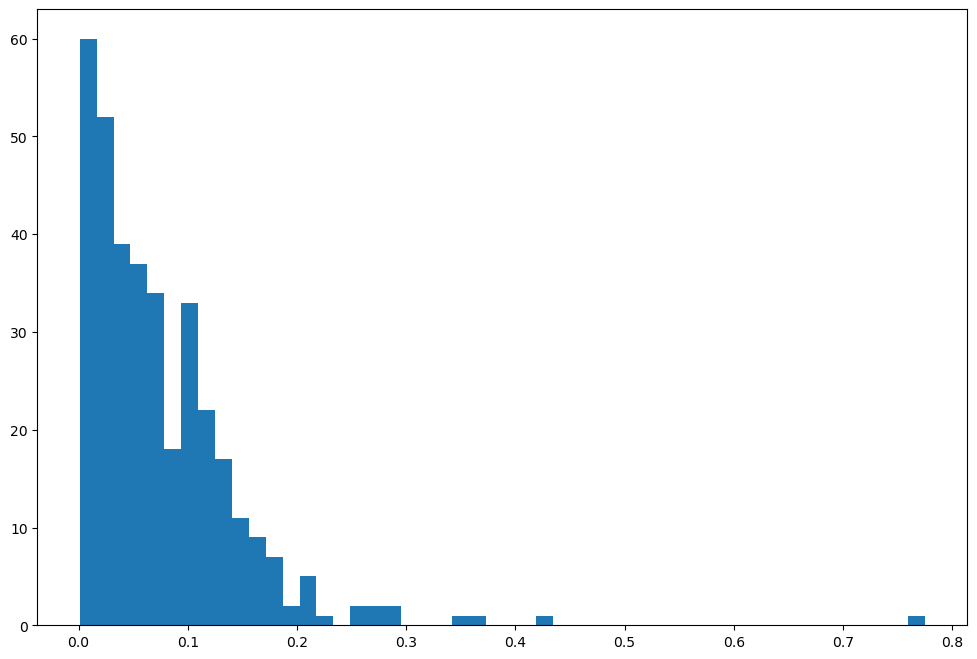

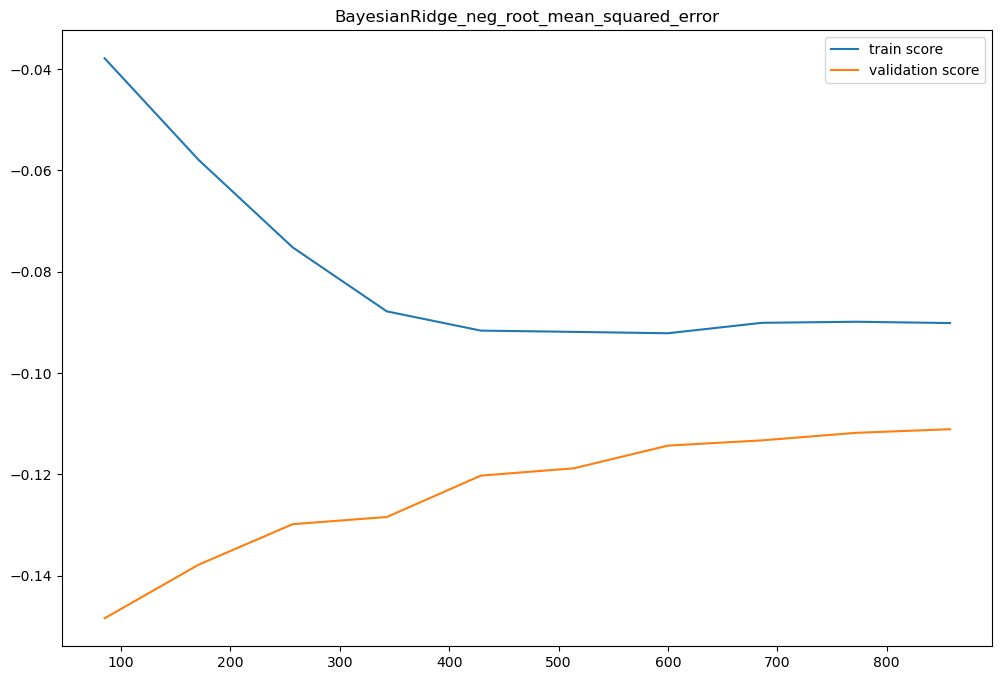

________________________________________________________________________________________________________________________ 



In [153]:
dct_best_estim = {}
for name, hp in dct_hyper_params.items():
    model = dict_of_models[name]
    
    print('>>> ', name)
    
    #grid = BayesSearchCV(model, hp, scoring='neg_root_mean_squared_error', cv=5, random_state=0)
    #grid = RandomizedSearchCV(model, hp, scoring='neg_root_mean_squared_error', cv=5, n_iter=30, random_state=0)
    grid = BayesSearchCV(model, hp, scoring='neg_root_mean_squared_error', cv=5, n_iter=30, random_state=0)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

    dct_best_estim[name] = grid

    #y_pred = grid.predict(X_test)
    #print(classification_report(y_test, y_pred)

    evaluation(grid.best_estimator_, model_name=name)
    
    print('_'*120, '\n')

**Model optimisation :**
1. ...
    - ElasticNet :
        - best : {'elasticnet__alpha': 0, 'elasticnet__l1_ratio': 0.75, 'elasticnet__tol': 0.001, 'elasticnet__warm_start': False, 'pipeline__pca__n_components': 87, 'pipeline__selectkbest__k': 189}
        - score : 
            - RMSE : 24251.857256823376
            - MeanAE : 17303.69764614056
            - MedSE : 12860.969146149379
        - curve :
            - histo : exp ->  60k + somes 80k and few 120k
            - train/valid : no ov
   - BayesianRidge :
        - best : {'bayesianridge__alpha_1': 1e-07, 'bayesianridge__alpha_2': 1e-07, 'bayesianridge__lambda_1': 1e-05, 'bayesianridge__lambda_2': 1e-07, 'bayesianridge__tol': 0.0001, 'pipeline__selectkbest__k': 189}
        - score : 
            - RMSE : 22479.30072823478
            - MeanAE : 16058.716870099046
            - MedSE : 12921.4622910732
        - curve :
            - histo : exp -> 55k + somes 80k  + 110k + 130k
            - train/valid :
    - ARDRegression :
        - best : {'ardregression__alpha_1': 1e-05, 'ardregression__alpha_2': 1e-05, 'ardregression__lambda_1': 1e-06, 'ardregression__lambda_2': 5.816920061687875e-06, 'ardregression__threshold_lambda': 3859, 'ardregression__tol': 1e-05, 'pipeline__selectkbest__k': 189}
        - score : 
            - RMSE : 22364.697662435967
            - MeanAE : 15820.676573929197
            - MedSE : 11958.039777357568
        - curve :
            - histo : exp -> 70k/90k + 110k + 120k
            - train/valid : sligh ov
    - RandomForestRegressor :
        - best : {'pipeline__selectkbest__k': 169, 'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__max_features': None, 'randomforestregressor__n_estimators': 200, 'randomforestregressor__warm_start': False}
        - score : 
            - RMSE : 23599.18822584603
            - MeanAE : 15609.157184873948
            - MedSE : 10300.119999999995
        - curve :
            - histo : exp -> 80k + somes 120k + 160k
            - train/valid : overfitting
2. ...
   - BayesianRidge :
        - best : {'bayesianridge__alpha_1': 4.877964496626273e-08, 'bayesianridge__alpha_2': 7.737983897855525e-08, 'bayesianridge__lambda_1': 0.004616442909140281, 'bayesianridge__lambda_2': 8.912718092360759e-08, 'bayesianridge__tol': 0.000876419640419354, 'pipeline__selectkbest__k': 192}
        - score : 
            - RMSE : 22278.336090259047
            - MeanAE : 15924.064702534188
            - MedSE : 12756.731630452487
        - curve :
            - histo : exp -> 55k + somes 80k  + 110k + 130k
            - train/valid : same
    - ARDRegression :
        - best : {'ardregression__alpha_1': 9.571017162494206e-05, 'ardregression__alpha_2': 3.438552519550807e-05, 'ardregression__lambda_1': 7.048764720680063e-07, 'ardregression__lambda_2': 3.154333241573492e-07, 'ardregression__threshold_lambda': 3408, 'ardregression__tol': 8.132034649933548e-05, 'pipeline__selectkbest__k': 235}
        - score : 
            - RMSE : 22420.091829427976
            - MeanAE : 15870.5471005455
            - MedSE : 11734.82332244562
        - curve :
            - histo : exp -> 50k + some 60k + some 80k + 110k + 120k
            - train/valid : sligh ov
    - RandomForestRegressor :
        - best : {'pipeline__selectkbest__k': 176, 'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__max_features': 251, 'randomforestregressor__n_estimators': 305, 'randomforestregressor__warm_start': True}
        - score : 
            - RMSE : 23752.422687929466
            - MeanAE : 15692.266464618635
            - MedSE : 9815.442622950824
        - curve :
            - histo : exp -> 70k + 100k + 110k + 160k
            - train/valid : overfitting
3. New try after log skewed variables
   - BayesianRidge :
        - best : {'bayesianridge__alpha_1': 1.517578239029447e-08, 'bayesianridge__alpha_2': 1.83736808667223e-08, 'bayesianridge__lambda_1': 0.008902360740329494, 'bayesianridge__lambda_2': 1.1761764484341009e-08, 'bayesianridge__tol': 0.00021207455903481687, 'pipeline__selectkbest__k': 266}
        - score : 
            - RMSE : 0.10540696439982036 (1.11)
            - MeanAE : 0.07555915804853848 (1.08)
            - MedAE : 0.05819149385717459 (1.06)
        - curve :
            - histo : exp -> 0.3 + somes 0.4  + 0.8
            - train/valid : slight interval, not really ov  (-0.09 / -0.11)
    - ARDRegression :
        - best : {'ardregression__alpha_1': 1.96136491426469e-05, 'ardregression__alpha_2': 6.111462367508804e-05, 'ardregression__lambda_1': 3.936258721532526e-07, 'ardregression__lambda_2': 8.056367859525278e-07, 'ardregression__threshold_lambda': 3091, 'ardregression__tol': 7.251224184928802e-05, 'pipeline__selectkbest__k': 186}
        - score : 
            - RMSE : 0.11555162484682371 (1.12)
            - MeanAE : 0.0791657365565981 (1.08)
            - MedAE : 0.05911371786778119 (1.06)
        - curve :
            - histo : exp -> 0.4 + 0.55 + 0.8
            - train/valid : slight interval, not really ov
    - RandomForestRegressor :
        - best : {'pipeline__selectkbest__k': 198, 'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__max_features': 59, 'randomforestregressor__n_estimators': 468, 'randomforestregressor__warm_start': False}
        - score : 
            - RMSE : 0.12339543382493906 (1.13)
            - MeanAE : 0.08649097722487634 (1.09)
            - MedAE : 0.06034929867004202 (1.06)
        - curve :
            - histo : exp -> 0.35/0.5 + 0.6 + 0.8
            - train/valid : overfitting

**Best : BayesianRidge (3.)**

**Test with XGBoost :**

This is a popular algorithm, so I want to compare.

1. ...
   - best : {'pipeline__selectkbest__k': 258, 'xgbregressor__alpha': 8, 'xgbregressor__colsample_bytree': 0, 'xgbregressor__gamma': 0, 'xgbregressor__lambda': 6, 'xgbregressor__learning_rate': 1, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 10, 'xgbregressor__n_estimators': 9873, 'xgbregressor__subsample': 1}
    - score : 
        - RMSE : 0.1618710062652921 (1.18)
        - MeanAE : 0.12158917595658628 (1.13)
        - MedAE : 0.0893192247848571 (1.09)
    - curve :
        - histo : exp -> 0.4 / 0.5 + two 0.7 
        - train/valid : no ov (-0.16 / -0.19)

In [154]:
dct_best_estim

{'BayesianRidge': BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('pipeline',
                                          Pipeline(steps=[('selectkbest',
                                                           SelectKBest(k=179,
                                                                       score_func=<function f_regression at 0x7c6cb5bd6840>)),
                                                          ('robustscaler',
                                                           RobustScaler())])),
                                         ('bayesianridge', BayesianRidge())]),
               n_iter=30, random_state=0, scoring='neg_root_mean_squared_error',
               search_spaces={'bayesianridge__alpha_1': [1e-08, 1e-07],
                              'bayesianridge__alpha_2': [1e-08, 1e-07],
                              'bayesianridge__lambda_1': [1e-05, 0.01],
                              'bayesianridge__lambda_2': [1e-08, 1e-07],
                          

## Construct CSV for Kaggle answer

In [236]:
df_eval =  pd.read_csv('data/test.csv')
print(len(df_eval.index))
df_eval

1459


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
30    1491          60       RL         70.0    11920   Pave   NaN      Reg   
31    1492          30       RH         70.0     9800   Pave   NaN      Reg   
32    1493          20       RL         39.0    15410   Pave   NaN      IR1   
33    1494          60       RL         85.0    13143   Pave   NaN      IR1   
34    1495          60       RL         88.0    11134   Pave   NaN      Reg   
35    1496         120       FV         25.0     4835   Pave   NaN      IR1   
36    1497         160       FV         39.0     3515   Pave  Pave      Reg   
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
39    1500         160       FV         24.0     2544   Pave  Pave      Reg   
40    1501         160       FV          NaN     2980   Pave   NaN      Reg   
41    1502         160       FV          NaN     2403   Pave   NaN      IR1   
42    1503          20       FV         57.0    12853   Pave  Pave      IR1   
43    1504          60       FV         68.0     7379   Pave   NaN      IR1   
44    1505          20       FV         80.0     8000   Pave   NaN      Reg   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
46    1507          60       RL         80.0    10791   Pave   NaN      Reg   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
48    1509          60       RL         80.0     9600   Pave   NaN      Reg   
49    1510          20       RL         80.0     9600   Pa

In [237]:
X_eval, y_eval, encoder_eval = preprocessing(df_eval, encoder=encoder_train, remove_outliers=False)
print(len(X_eval.index))
X_eval.head()

No outcome
1459


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0  9.360655            5            6       1961   
1          20         81.0  9.565704            6            6       1958   
2          60         74.0  9.534595            5            5       1997   
3          60         78.0  9.208138            6            6       1998   
4         120         43.0  8.518193            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1961         0.0       468.0       144.0      270.0        882.0   
1          1958       108.0       923.0         0.0      406.0       1329.0   
2          1998         0.0       791.0         0.0      137.0        928.0   
3          1998        20.0       602.0         0.0      324.0        926.0   
4          1992         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0   6.797940           0.0           0.0   
1      1329         0             0   7.192182           0.0           0.0   
2       928       701             0   7.395722           0.0           0.0   
3       926       678             0   7.380256           0.0           0.0   
4      1280         0             0   7.154615           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1         0             2             1             5           0   
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1961.0         1.0       730.0         140            0   
1       1958.0         1.0       312.0         393           36   
2       1997.0         2.0       482.0         212           34   
3       1998.0         2.0       470.0         360           36   
4       1992.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0          120         0        0       6    2010   
1              0          0            0         0    12500       6    2010   
2              0          0            0         0        0       3    2010   
3              0          0            0         0        0       6    2010   
4              0          0          144         0        0       1    2010   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  \
0               0.0          0.0          1.0          0.0  ...   
1               0.0          0.0          0.0          1.0  ...   
2               0.0          0.0          0.0          1.0  ...   
3               0.0          0.0          0.0          1.0  ...   
4               0.0          0.0          0.0          1.0  ...   

   GarageQual_Po  GarageQual_TA  GarageQual_nan  GarageCond_Ex  GarageCond_Fa  \
0            0.0            1.0             0.0            0.0            0.0   
1            0.0            1.0             0.0            0.0            0.0   
2            0.0            1.0             0.0            0.0            0.0   
3            0.0            1.0             0.0            0.0            0.0   
4            0.0            1.0             0.0            0.0            0.0   

   GarageCond_Gd  GarageCond_Po  GarageCond_TA  GarageCond_nan  PavedDrive_N  \
0            0.0            0.0            1.0             0.0           0.0   
1            0.0            0.0            1.0             0.0           0.0   
2            0.0            0.0            1.0             0.0           0.0   
3            0.0            0.0  

In [221]:
def __add_missings_cols_onehot__(X_eval):
    train_cols = list(X_train.columns)
    eval_cols = list(X_eval.columns)
    msg = f'Train set has {len(train_cols)} columns and eval set has {len(eval_cols)} columns.'
    warnings.warn(msg)
    
    nb_row = len(X_eval.index)
    missing_cols = list(set(train_cols) - set(eval_cols))
    for col in missing_cols:
        print(col)
        X_eval[col] = np.zeros(nb_row)

    return X_eval

In [222]:
def final_model(model, X):
    X = __add_missings_cols_onehot__(X)
    return np.floor(np.exp(model.predict(X)))

In [238]:
y_pred = final_model(dct_best_estim['BayesianRidge'].best_estimator_, X_eval)
print(len(y_pred))
#y_pred

1459


In [239]:
list_id = df_eval['Id'].to_numpy()
len(list_id)

1459

In [240]:
data = {
    'Id':list_id,
    'SalePrice':y_pred
}
df_answer = pd.DataFrame.from_dict(data)
df_answer

Id  SalePrice
0     1461   115840.0
1     1462   161221.0
2     1463   182105.0
3     1464   197136.0
4     1465   184769.0
5     1466   167815.0
6     1467   179370.0
7     1468   159020.0
8     1469   191325.0
9     1470   117135.0
10    1471   182137.0
11    1472    97108.0
12    1473    94726.0
13    1474   145175.0
14    1475   110508.0
15    1476   355535.0
16    1477   243318.0
17    1478   295623.0
18    1479   288521.0
19    1480   532060.0
20    1481   318621.0
21    1482   208480.0
22    1483   177240.0
23    1484   162422.0
24    1485   191826.0
25    1486   191655.0
26    1487   338013.0
27    1488   231525.0
28    1489   194157.0
29    1490   244786.0
30    1491   194087.0
31    1492    88923.0
32    1493   188157.0
33    1494   282745.0
34    1495   280348.0
35    1496   232889.0
36    1497   183329.0
37    1498   175326.0
38    1499   165315.0
39    1500   158589.0
40    1501   177017.0
41    1502   146896.0
42    1503   286372.0
43    1504   243377.0
44    1505   227390.0
45    1506   197846.0
46    1507   251825.0
47    1508   208196.0
48    1509   156966.0
49    1510   145008.0
50    1511   155410.0
51    1512   173422.0
52    1513   155044.0
53    1514   154797.0
54    1515   188024.0
55    1516   151440.0
56    1517   178278.0
57    1518   130116.0
58    1519   214151.0
59    1520   129649.0
60    1521   129359.0
61    1522   169056.0
62    1523   114478.0
63    1524   126702.0
64    1525   114933.0
65    1526   110278.0
66    1527   107359.0
67    1528   136715.0
68    1529   146751.0
69    1530   202402.0
70    1531   105192.0
71    1532    93030.0
72    1533   155654.0
73    1534   126108.0
74    1535   146504.0
75    1536   106079.0
76    1537    55596.0
77    1538   141203.0
78    1539   186450.0
79    1540    86897.0
80    1541   139634.0
81    1542   139956.0
82    1543   191453.0
83    1544    87692.0
84    1545   118224.0
85    1546   136019.0
86    1547   132330.0
87    1548   140416.0
88    1549   120504.0
89    1550   135095.0
90    1551   105968.0
91    1552   128835.0
92    1553   141476.0
93    1554   116155.0
94    1555   157205.0
95    1556    82122.0
96    1557    99164.0
97    1558   107632.0
98    1559    65430.0
99    1560   122304.0
100   1561   116450.0
101   1562   130262.0
102   1563   120475.0
103   1564   156414.0
104   1565   140593.0
105   1566   252862.0
106   1567    77661.0
107   1568   243559.0
108   1569   133942.0
109   1570   135486.0
110   1571   117181.0
111   1572   144443.0
112   1573   242446.0
113   1574   113235.0
114   1575   232599.0
115   1576   241325.0
116   1577   180122.0
117   1578   148833.0
118   1579   139181.0
119   1580   196320.0
120   1581   160344.0
121   1582   122578.0
122   1583   299382.0
123   1584   219590.0
124   1585   135396.0
125   1586    73416.0
126   1587   103022.0
127   1588   149798.0
128   1589    98900.0
129   1590   134234.0
130   1591    91501.0
131   1592   113271.0
132   1593   123497.0
133   1594   126594.0
134   1595   102853.0
135   1596   216876.0
136   1597   198148.0
137   1598   231592.0
138   1599   169381.0
139   1600   159267.0
140   1601    64545.0
141   1602   109558.0
142   1603    72384.0
143   1604   263021.0
144   1605   237673.0
145   1606   171333.0
146   1607   183202.0
147   1608   211322.0
148   1609   179227.0
149   1610   149602.0
150   1611   141379.0
151   1612   168608.0
152   1613   164052.0
153   1614   122914.0
154   1615    91598.0
155   1616    78364.0
156   1617    91335.0
157   1618   129260.0
158   1619   137462.0
159   1620   152299.0
160   1621   127182.0
161   1622   143756.0
162   1623   261703.0
163   1624   212672.0
164   1625   116009.0
165   1626   172595.0
166   1627   191754.0
167   1628   280545.0
168   1629   179650.0
169   1630   353897.0
170   1631   217212.0
171   1632   235440.0
172   1633   178183.0
173   1634   185605.0
174   1635   172531.0
175   1636   145765.0
176   1637   204921.0
177   1638   176119.0
178   1639   189328.0
179   1640   254014.0
180   1641   180686.0
181 

In [241]:
df_answer.to_csv('data/answer.csv', index=False)

___